In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# CarSeat 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Carseats.csv'
carseat = pd.read_csv(path)
carseat.drop('Education', axis=1, inplace=True)
carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


**📋 데이터 정보**

- Sales: 각 지역 판매량(단위: 1,000개)
- CompPrice: 경쟁사 가격(단위: 달러)
- Income: 지역 평균 소득(단위: 1,000달러)
- Advertising: 각 지역, 회사의 광고 예산(단위: 1,000달러)
- Population: 지역 인구수(단위: 1,000명)
- Price: 자사 지역별 판매가격
- ShelveLoc: 진열상태
- Age: 지역 인구의 평균 연령
- Urban: 도심 지역 여부(Yes, No)
- US: 매장이 미국에 있는지 여부(Yes, No)

## **2. 시각화**

**1) 다음 두 변수들 간의 상관관계를 산점도로 시각화해 확인하세요.**

1️⃣ **평균소득(Income) → 판매량(Sales)**

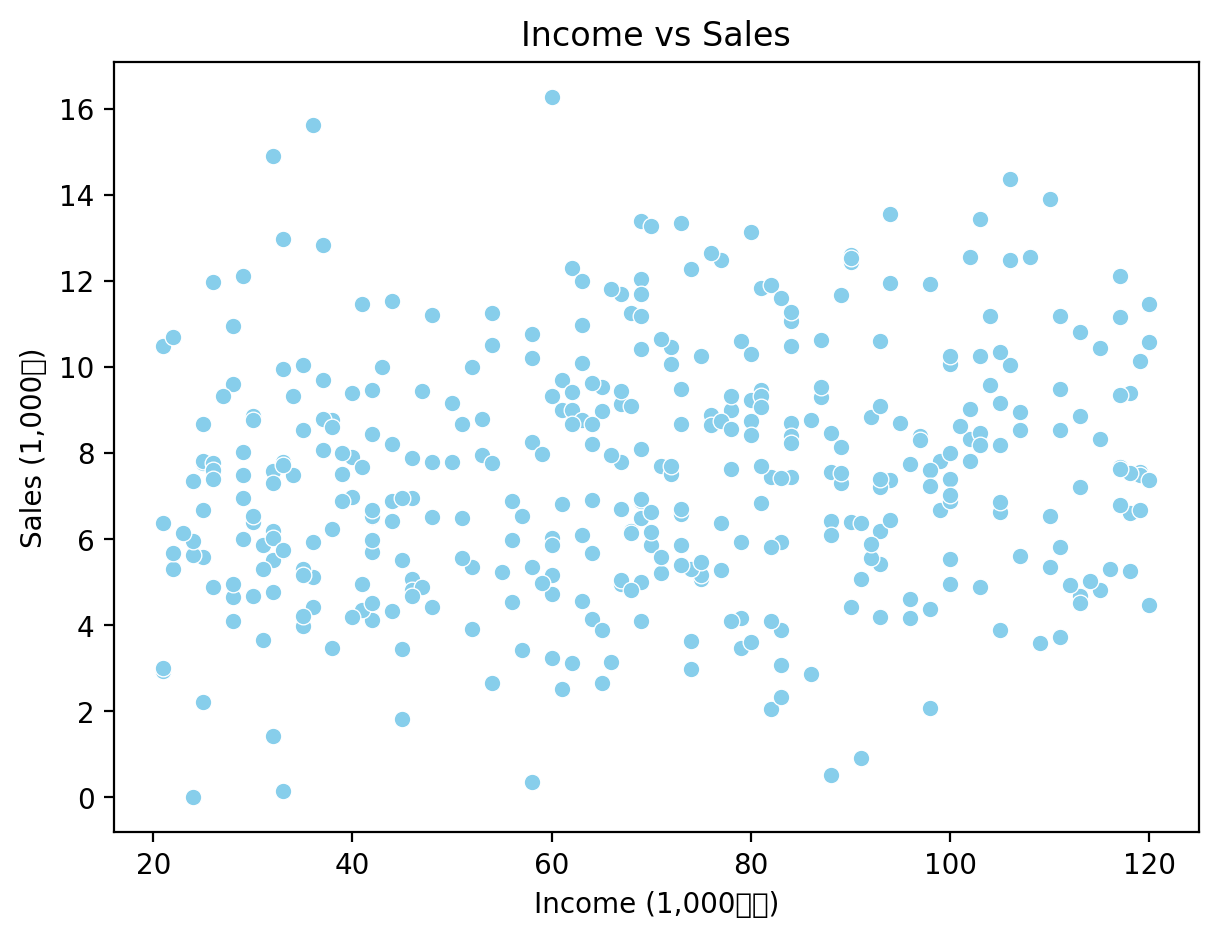

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Income', y='Sales', data=carseat, color='skyblue')
plt.xlabel("Income")
plt.ylabel("Sales")
plt.show()

- **질문:** 시각화 결과로 무엇을 확인할 수 있나요?

In [ ]:
#

2️⃣ **판매가격(Price) → 판매량(Sales)**

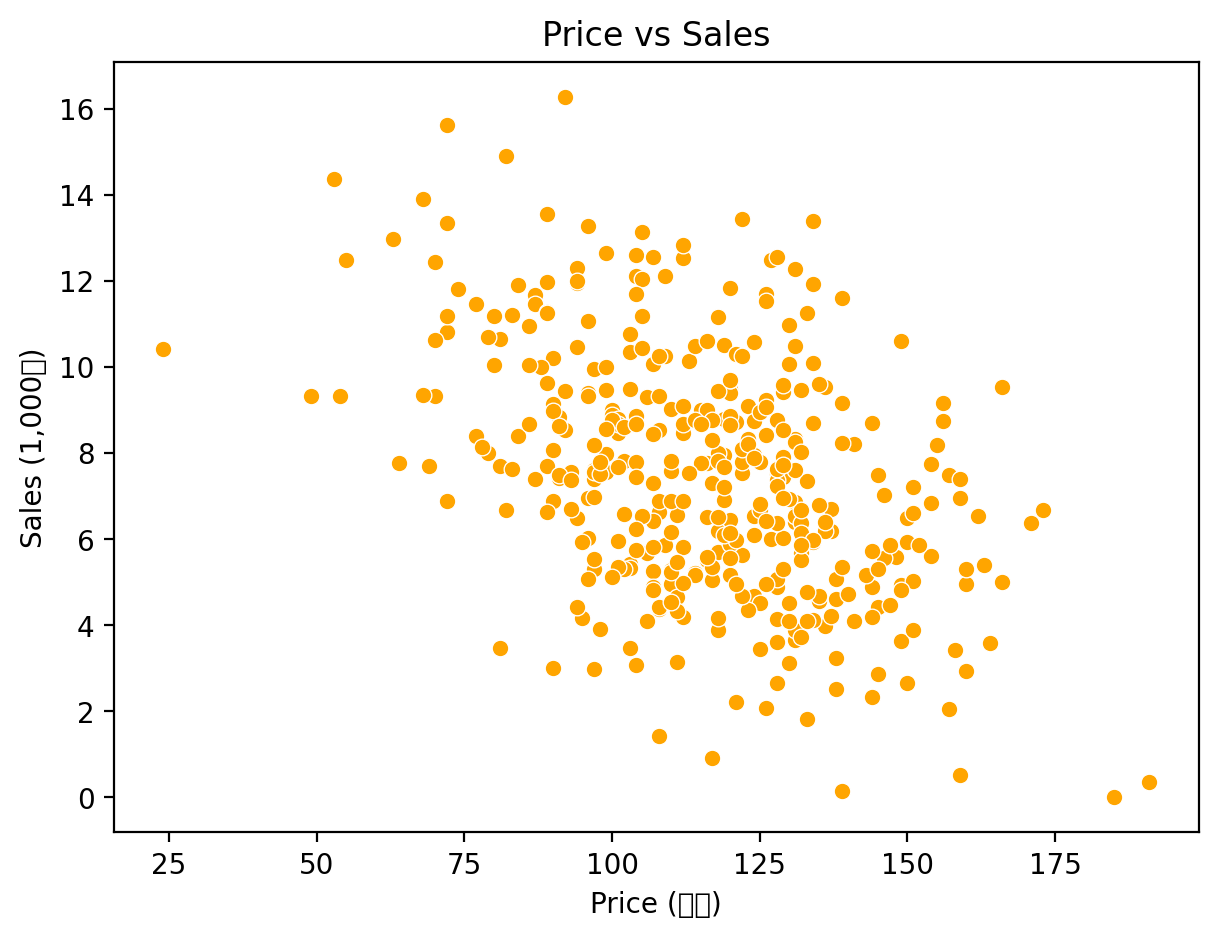

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Price', y='Sales', data=carseat, color='orange')
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

- **질문:** 시각화 결과로 무엇을 확인할 수 있나요?

In [ ]:
#

3️⃣ **평균연령(Age) → 판매량(Sales)**

- **질문:** 시각화 결과로 무엇을 확인할 수 있나요?

In [ ]:
#

**2) 모든 숫자형 변수에 대한 산점도를 한꺼번에 그려보세요.**

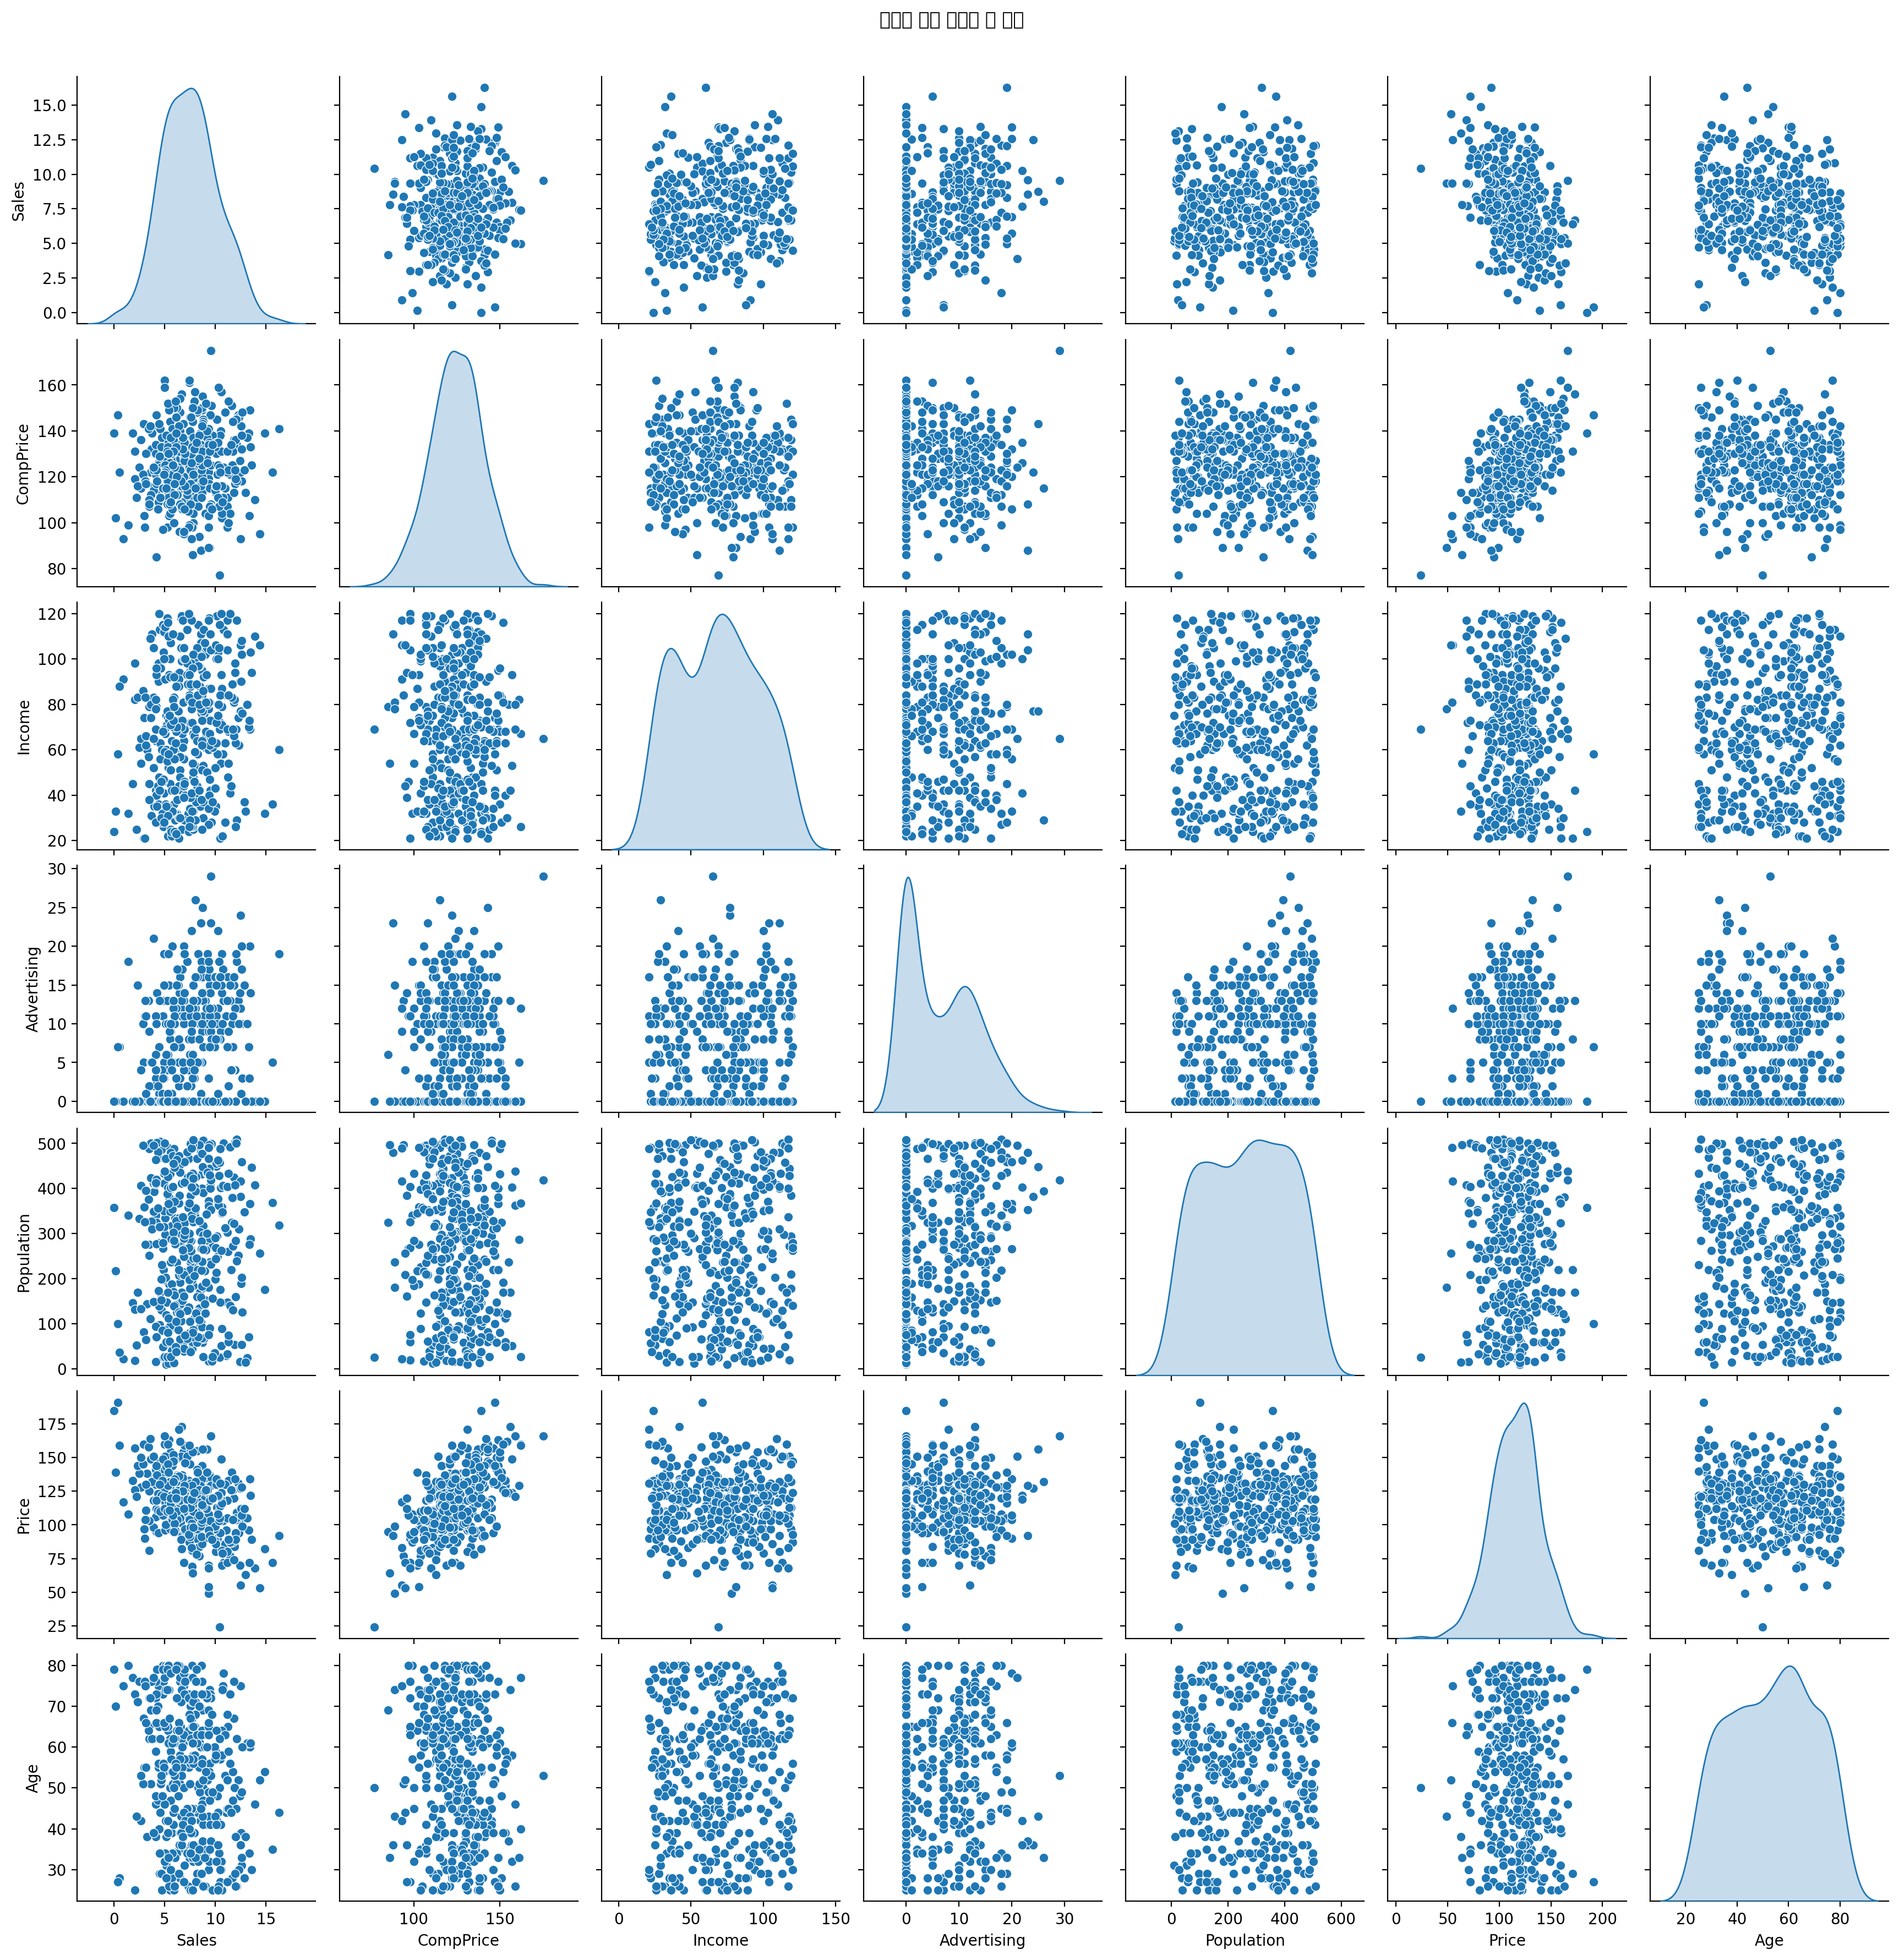

In [8]:
# 숫자형 변수 선택
num_cols = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age']

# pairplot 그리기
sns.pairplot(carseat[num_cols], diag_kind='kde', corner=False)
plt.suptitle("숫자형 변수 산점도 및 분포", y=1.02)
plt.show()

## **3. 수치화**

**1) 다음 두 변수들 간의 상관관계를 상관계수와 p_value로 수치화해 확인하세요.**

1️⃣ **평균소득(Income) → 판매량(Sales)**

In [10]:
from scipy.stats import pearsonr

# 변수 선택
x = carseat['Income']
y = carseat['Sales']

# 피어슨 상관계수 및 p-value 계산
corr_coef, p_value = pearsonr(x, y)

print(f"Income ↔ Sales 상관계수: {corr_coef:.3f}")
print(f"p-value: {p_value:.3f}")

Income ↔ Sales 상관계수: 0.152
p-value: 0.002


- **질문:** 결과를 해석해 보세요.

In [ ]:
#

2️⃣ **판매가격(Price) → 판매량(Sales)**

In [11]:
# 변수 선택
x = carseat['Price']
y = carseat['Sales']

# 피어슨 상관계수 및 p-value 계산
corr_coef, p_value = pearsonr(x, y)

print(f"Income ↔ Sales 상관계수: {corr_coef:.3f}")
print(f"p-value: {p_value:.3f}")

Income ↔ Sales 상관계수: -0.445
p-value: 0.000


- **질문:** 결과를 해석해 보세요.

In [ ]:
#

3️⃣ **평균연령(Age) → 판매량(Sales)**

In [ ]:
# 변수 선택
x = carseat['Age']
y = carseat['Sales']

# 피어슨 상관계수 및 p-value 계산
corr_coef, p_value = pearsonr(x, y)

print(f"Income ↔ Sales 상관계수: {corr_coef:.3f}")
print(f"p-value: {p_value:.3f}")

Income ↔ Sales 상관계수: -0.232
p-value: 0.000


- **질문:** 결과를 해석해 보세요.

In [ ]:
#

**2) 각 변수들 간에 상관계수를 구해 보세요.**

In [13]:
# 상관계수 계산
corr_matrix = carseat[num_cols].corr()
print(corr_matrix)

                Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   

                  Age  
Sales       -0.231815  
CompPrice   -0.100239  
Income      -0.004670  
Advertising -0.004557  
Population  -0.042663  
Price       -0.102177  
Age          1.000000  


**3) 위 결과를 Seaborn의 heatmap() 함수로 시각화하세요.**

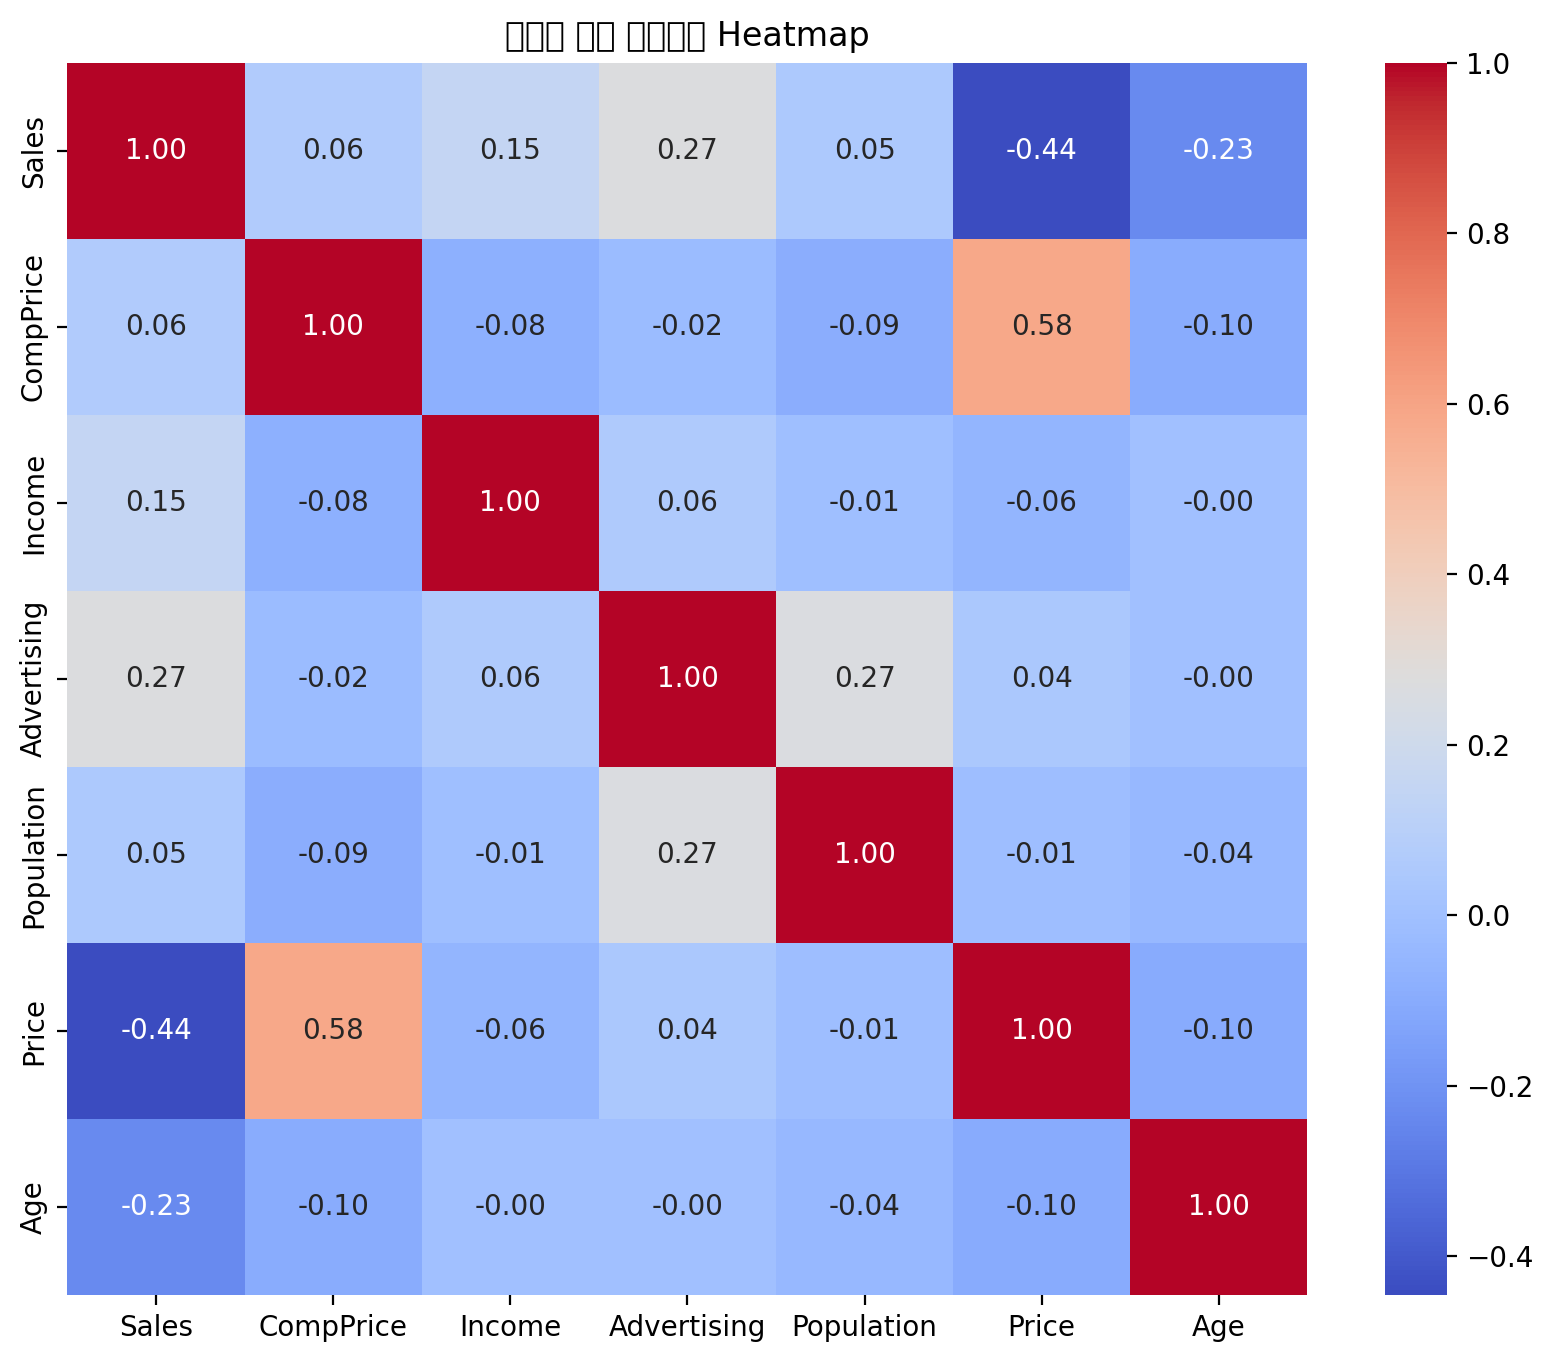

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True) 
plt.show()xz

- **질문:** 위 결과에서 가장 강한 상관관계와 약한 상관관계를 찾아 보세요.

In [ ]:
# 가장 강한 상관관계: price <-> compprice
# 가장 약한 상관관계: income <-> age